# It was never meant to be working or studying project
## This notebook served me as a "quick calculator" during my comprehension of mathematical probability

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from scipy.stats import norm

from decimal import *

import pandas as pd

getcontext().prec = 4

In [2]:
from Basic_stats import *

In [3]:
def build_prob_func(x, p, printer=False):
    x1 = []
    p1 = []

    for i in range(len(x)):

        if i == 0:
            x1.append([np.NINF, x[i]])
            cur_weights = 0

        if 0 < i < len(x):
            x1.append([x[i-1], x[i]])
            cur_weights = p[i-1] + cur_weights
        p1.append([cur_weights, cur_weights ])
    x1.append([x[-1], np.inf])
    p1.append([1, 1])
    
    if printer == True:
        print(f'F(x):')
        for i in range(len(x1)):
            print(f'{round(p1[i][0], 4):<3} | {x1[i][0]:^4} < x <= {x1[i][1]:^3}')
    
    return x1, p1
    
def plot_Fx_discreet(x,x1, p1):
    
    d = {np.inf: 10^16, np.NINF: -10^16}
    
    plt.grid(visible=True, which='both')
    plt.yticks(np.linspace(0, 1, 11))
    plt.xticks(range(min(x)-1, max(x)+10))
    plt.xlim(min(x)-2, max(x)+2)
    
    
    for i, n in zip(x1, p1):
        plt.plot(i, n, linewidth=4)
        plt.scatter(i[-1], n[-1])
    
    plt.plot([x1[0][1]-3, x1[0][1]], p1[0], linewidth=4)
    plt.plot([x1[-1][0], x1[-1][0]+3], p1[-1], linewidth=4)
    
    
def prob_polygon(x, p):
    plt.grid(visible=True)

    plt.plot(x, p)
    plt.scatter(x, p, color='r')
    plt.xlim((min(x)-1, max(x)+2))
    plt.ylim((0, max(map(float, p))+0.1))
    plt.show()

In [4]:
def build_Fx(x, p, mode='Fx'):
    if mode == 'Fx':
        assert len(x) - len(p) ==1, 'The len of x must be at least 1 more than of p'
    elif mode == 'fx':
        assert len(x) == len(p), 'The len of x must be the same as p. Insert 0, 1, and n functions'
    
    temp_x = x
    temp_p = p
    temp_x.insert(0, np.NINF)
    temp_x.insert(len(x), np.inf)
    
    temp_p.insert(0, 0)
    if mode == 'Fx':
        temp_p.insert(len(p), 1)
    elif mode == 'fx':
        temp_p.insert(len(p), p[-1])
    
    rng = len(x)-1 if len(x)%2 == 0 else len(x) - (len(x)%2)
    
    d = tuple([temp_p[i], [temp_x[i], temp_x[i+1]]] for i in range(rng))
    
    return d

# TODO построить ф-ию распределения НСВ и её плотности

In [5]:
def handle_infs(_range):
    if np.inf in _range:
        x_range = [_range[0], _range[0]+1]

    elif np.NINF in _range:
        x_range = [_range[-1]-1, _range[-1]]

    else:
        x_range = _range
        
    return x_range

In [6]:
def plot_fx_inf(fx):
    for pair in fx:
        Fxfs_iterator(function=pair[0], x_range=handle_infs(pair[-1]), orig_range=pair[-1])
        
def Fxfs_iterator(function, x_range, orig_range):
    f = lambdify("x", function)

    ys = [f(i) for i in np.linspace(x_range[0], x_range[-1], 50)]
    xs = np.linspace(x_range[0], x_range[-1], 50)

    plt.grid(True)
    plt.axhline(0, color='k', linewidth=.5)
    plt.axvline(0, color='k', linewidth =.5)
    plt.plot(xs, ys, linewidth=2, label=f'x e ({round(orig_range[0], 3)}, {round(orig_range[-1], 3)})')
    plt.ylim((-.2, 1.5))
    plt.legend()

In [7]:
def Fx_to_fx(input_fx):
    return tuple( [diff(i[0], 'x'), i[1]] for i in input_fx)

def norm_stat_dist(a, sigm, x):
    """
    x: int or tuple. 
    If tuple should be presented like (min_val, max_val)
    """
    if type(x) == tuple:
        min_z = (x[0] - a) / sigm
        max_z = (x[1] - a) / sigm
        prob = norm.cdf(max_z) - norm.cdf(min_z)
        
    else:
        z_score = (x - a) / sigm
        prob = norm.cdf(z_score) 
    return round(prob, 4)

In [8]:
norm_stat_dist(a=-1, sigm=3, x=(-4, 1))

0.5889

# Функция распределения случайной величины

In [9]:
funcs = [
    Symbol('x') / 7
]

Fx = build_Fx([0, 7], funcs)

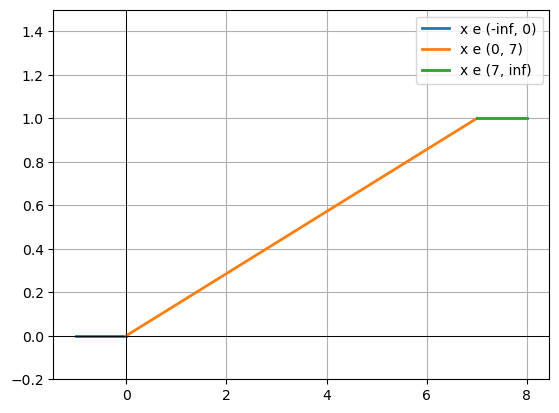

In [10]:
plot_fx_inf(Fx)

In [11]:
fx = Fx_to_fx(Fx)

In [12]:
fx

([0, [-inf, 0]], [1/7, [0, 7]], [0, [7, inf]])

# Функция плотности случайной величины

In [13]:
funcs = [
    1/7, 
    2/5,
    13/14, 
    Symbol('x') // 7
]

fx = build_Fx(list(range(0, 5)), funcs, mode='Fx')

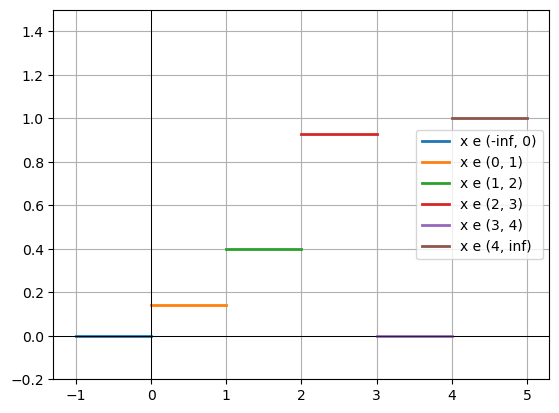

In [14]:
plot_fx_inf(fx)